<a href="https://colab.research.google.com/github/fervassoler/bootcamp-data-science-aplicada/blob/main/Projeto_modulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Módulo 1

Nesse estudo quero analisar a diferença na mortalidade da população tendo em vista o impacto da pandemia de covid-19 no ano de 2020 em comparação com a mortalidade do ano anterior

## imports

In [49]:
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt

## Análise exploratória

Nesse estudo estão sendo utilizadas as bases de dados disponibilizadas no [github da Alula](https://github.com/alura-cursos/agendamento-hospitalar/tree/main/dados):
- Brasil io(casos_covid)
- População estimada pelo ibge(populacao_ibge_2020)
- Obitos-registro-civil(obitos)

In [50]:
#lendo os datasets
obitos = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/obitos-registro-civil.csv')
casos_covid = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bootcamp/Modulo1/caso.csv')
populacao_ibge_2020 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bootcamp/Modulo1/populacao_ibge.csv', sep=';')

In [51]:
display(obitos.head())
display(casos_covid.head())
display(populacao_ibge_2020.head())

,year,month,state,deaths
0,1970,1,AM,1
1,1970,1,BA,6
2,1970,1,CE,9
3,1970,1,DF,52
4,1970,1,ES,65


,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224


,BRASIL E UNIDADES DA FEDERAÇÃO,POPULAÇÃO ESTIMADA
0,Brasil,211755692
1,Região Norte,18672591
2,Rondônia,1796460
3,Acre,894470
4,Amazonas,4207714


o que pretendo avaliar:
- calcular taxa de mortalidade por estado de 2019 para 2020
- calcular a taxa de óbito por estado

Alguns pontos importantes:
- nos dados de obitos de 2020 temos informações referentes apenas até o mês 08, com isso os dados do ano anterior serão comparados até o mesmo mês para não haver um erro de proporção nos cálculos.
- como queremos comparar com os dados de covid no Brasil e no mês de Janeiro ainda não havia covid, esse mês também será desconsiderado

In [52]:
#removendo meses após 08 no ano de 2019 da análise
num_obitos = obitos.query(f'(year == 2020 or year == 2019) and month > 1 and month < 9')
num_obitos.query('year == 2019')['month'].unique()

array([2, 3, 4, 5, 6, 7, 8])

#### analisando em quais estados tiveram mais mortes no total em 2020 em comparação com 2019 até agosto

In [53]:
estados = list(obitos['state'].unique())
estados
flag = True
for estado in estados:
  obitos_2019 = num_obitos.query(f'year == 2019 & state == "{estado}"')['deaths'].sum()
  obitos_2020 = num_obitos.query(f'year == 2020 & state == "{estado}"')['deaths'].sum()

  if obitos_2020 > obitos_2019:
    if flag:
      print('Estados com mais mortes em 2020')
    print(f'{estado}: 2020-{obitos_2020} > 2019-{obitos_2019}')
    flag = False

Estados com mais mortes em 2020
AM: 2020-11999 > 2019-8490
BA: 2020-50022 > 2019-43627
CE: 2020-33849 > 2019-24700
DF: 2020-10901 > 2019-8751
ES: 2020-17006 > 2019-14569
GO: 2020-23301 > 2019-19729
MA: 2020-17244 > 2019-12981
MS: 2020-9986 > 2019-9565
MG: 2020-81551 > 2019-74894
PB: 2020-17236 > 2019-16133
PR: 2020-43403 > 2019-41776
PE: 2020-43860 > 2019-36306
RJ: 2020-100805 > 2019-86697
RN: 2020-11367 > 2019-10265
SC: 2020-25606 > 2019-24633
SP: 2020-208117 > 2019-185396
SE: 2020-8561 > 2019-7699
AL: 2020-12443 > 2019-10381
AC: 2020-2877 > 2019-2204
AP: 2020-1931 > 2019-1756
TO: 2020-3927 > 2019-3457
PA: 2020-20949 > 2019-15631
MT: 2020-10735 > 2019-8316
RO: 2020-5736 > 2019-4486
RR: 2020-1729 > 2019-1352


#### agrupando e limpando dados

In [54]:
casos_covid.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224


In [55]:
#separa data e retorna mes e dia
def month_day(date, type_info):  
  date_object = dt.strptime(date, '%Y-%m-%d').date()

  if type_info == 'day':
    return int(date_object.day)
  elif type_info == 'month':
    return int(date_object.month)

In [56]:
#adiciona coluna com a informação do dia e do mes da informação
casos_covid['dia'] = casos_covid['date'].apply(month_day, type_info='day')
casos_covid['mes'] = casos_covid['date'].apply(month_day, type_info='month')

In [57]:
#removendo dados de cidades e deixando apenas de estados até o mês de agosto
casos_covid_ago = pd.concat([casos_covid, casos_covid[~casos_covid['city'].isnull()]]).drop_duplicates(keep=False)
casos_covid_ago = casos_covid_ago.query('mes < 9')
casos_covid_ago

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,dia,mes
66,2020-08-31,AC,NaN,state,24647,612,168,False,881935.0,894470.0,12.0,2755.48649,0.0248,31,8
67,2020-08-30,AC,NaN,state,24638,609,167,False,881935.0,894470.0,12.0,2754.48031,0.0247,30,8
68,2020-08-29,AC,NaN,state,24601,608,166,False,881935.0,894470.0,12.0,2750.34378,0.0247,29,8
69,2020-08-28,AC,NaN,state,24462,608,165,False,881935.0,894470.0,12.0,2734.80385,0.0249,28,8
70,2020-08-27,AC,NaN,state,24269,607,164,False,881935.0,894470.0,12.0,2713.22683,0.0250,27,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822221,2020-02-29,SP,NaN,state,2,0,5,False,45919049.0,46289333.0,35.0,0.00432,0.0000,29,2
822222,2020-02-28,SP,NaN,state,2,0,4,False,45919049.0,46289333.0,35.0,0.00432,0.0000,28,2
822223,2020-02-27,SP,NaN,state,1,0,3,False,45919049.0,46289333.0,35.0,0.00216,0.0000,27,2
822224,2020-02-26,SP,NaN,state,1,0,2,False,45919049.0,46289333.0,35.0,0.00216,0.0000,26,2


In [58]:
num_obitos.head()

,year,month,state,deaths
14517,2019,2,AC,299
14518,2019,2,AL,1218
14519,2019,2,AP,220
14520,2019,2,AM,1161
14521,2019,2,BA,5817


In [59]:
#filtrando pelos dados do ultimo dia de cada mes
casos_covid_ago = casos_covid_ago.groupby(['state','mes']).first()
casos_covid_ago

date  city  ... death_rate  dia
state mes                    ...                
AC    3    2020-03-31  None  ...     0.0000   31
      4    2020-04-30  None  ...     0.0470   30
      5    2020-05-31  None  ...     0.0238   31
      6    2020-06-30  None  ...     0.0275   30
      7    2020-07-31  None  ...     0.0271   31
...               ...   ...  ...        ...  ...
TO    4    2020-04-30  None  ...     0.0183   30
      5    2020-05-31  None  ...     0.0175   31
      6    2020-06-30  None  ...     0.0182   30
      7    2020-07-31  None  ...     0.0154   31
      8    2020-08-31  None  ...     0.0133   31

[163 rows x 13 columns]

In [60]:
mortes_gerais = pd.merge(casos_covid_ago, num_obitos, how='left', left_on=['state','mes'], right_on = ['state','month'])

In [61]:
num_obitos.head()

,year,month,state,deaths
14517,2019,2,AC,299
14518,2019,2,AL,1218
14519,2019,2,AP,220
14520,2019,2,AM,1161
14521,2019,2,BA,5817


In [62]:
mortes_gerais.rename(columns={'deaths_x':'mortes_covid', 'deaths_y':'mortes_totais', 'estimated_population':'estimated_population_2020'}, inplace=True)
mortes_gerais.drop(['city', 'place_type', 'order_for_place', 'city_ibge_code', 'date', 'dia'], axis=1, inplace=True)
mortes_gerais.head()

,state,confirmed,mortes_covid,is_last,estimated_population_2019,estimated_population_2020,confirmed_per_100k_inhabitants,death_rate,year,month,mortes_totais
0,AC,42,0,False,881935.0,894470.0,4.69552,0.0000,2019,3,329
1,AC,42,0,False,881935.0,894470.0,4.69552,0.0000,2020,3,337
2,AC,404,19,False,881935.0,894470.0,45.16641,0.0470,2019,4,332
3,AC,404,19,False,881935.0,894470.0,45.16641,0.0470,2020,4,297
4,AC,6219,148,False,881935.0,894470.0,695.27206,0.0238,2019,5,316


In [63]:
mortes_gerais['mortes_totais'][1]

337

In [64]:
mortes_gerais

,state,confirmed,mortes_covid,is_last,estimated_population_2019,estimated_population_2020,confirmed_per_100k_inhabitants,death_rate,year,month,mortes_totais
0,AC,42,0,False,881935.0,894470.0,4.69552,0.0000,2019,3,329
1,AC,42,0,False,881935.0,894470.0,4.69552,0.0000,2020,3,337
2,AC,404,19,False,881935.0,894470.0,45.16641,0.0470,2019,4,332
3,AC,404,19,False,881935.0,894470.0,45.16641,0.0470,2020,4,297
4,AC,6219,148,False,881935.0,894470.0,695.27206,0.0238,2019,5,316
...,...,...,...,...,...,...,...,...,...,...,...
321,TO,11222,204,False,1572866.0,1590248.0,705.67610,0.0182,2020,6,552
322,TO,25346,390,False,1572866.0,1590248.0,1593.83945,0.0154,2019,7,556
323,TO,25346,390,False,1572866.0,1590248.0,1593.83945,0.0154,2020,7,683
324,TO,51629,687,False,1572866.0,1590248.0,3246.60053,0.0133,2019,8,526


#### taxa de mortes totais proporcional a população 2019 e 2020 por estado

In [65]:
#criando taxa de morte por ano
mortes_gerais['taxa_morte_2019'] = mortes_gerais['mortes_totais'] / mortes_gerais['estimated_population_2019']
mortes_gerais['taxa_morte_2020'] = mortes_gerais['mortes_totais'] / mortes_gerais['estimated_population_2020']

#gerando dados de taxa de morte agrupado por estado em 2019
mortes_gerais_2019 = mortes_gerais.query('year == 2019')
mortes_gerais_2019 = mortes_gerais_2019[['state','taxa_morte_2019','month']]
mortes_gerais_2019.set_index('month',inplace=True)
taxa_morte_por_estado_2019 = mortes_gerais_2019.groupby('state')['taxa_morte_2019'].sum()

#gerando dados de taxa de morte agrupado por estado em 2020
mortes_gerais_2020 = mortes_gerais.query('year == 2020')
mortes_gerais_2020 = mortes_gerais_2020[['state','taxa_morte_2020','month']]
mortes_gerais_2020.set_index('month',inplace=True)
taxa_morte_por_estado_2020 = mortes_gerais_2020.groupby('state')['taxa_morte_2020'].sum()

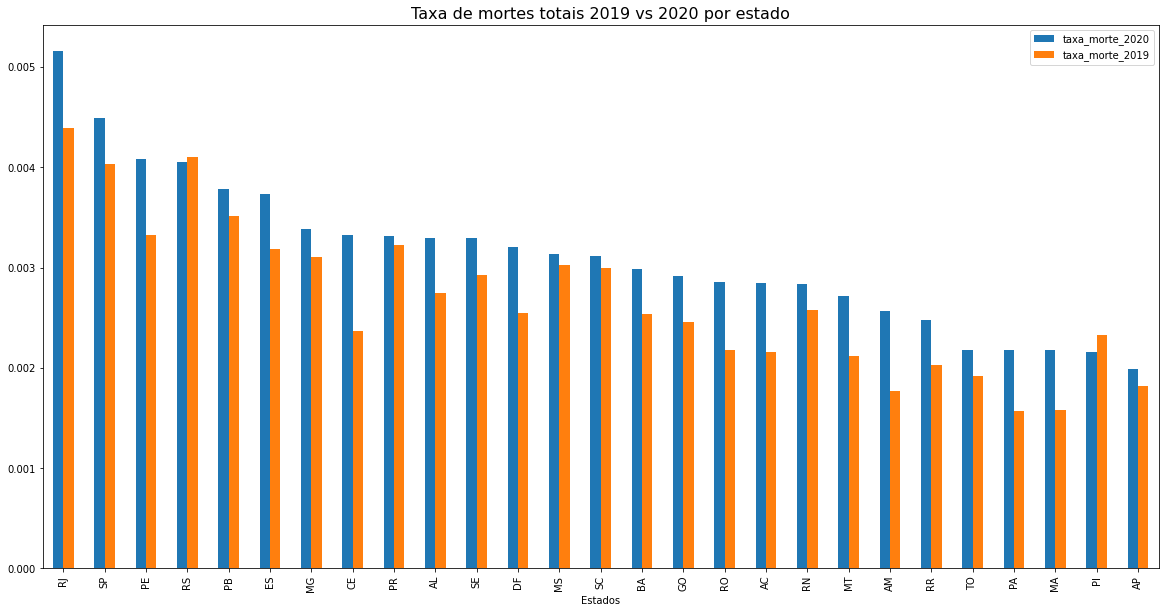

In [66]:
#criando gráfico
result = pd.concat([taxa_morte_por_estado_2020, taxa_morte_por_estado_2019], axis=1, sort=False)
result = result.sort_values(by=['taxa_morte_2020'], ascending=False)
ax = result.plot.bar(figsize=(20,10))
plt.title('Taxa de mortes totais 2019 vs 2020 por estado', fontsize=16)
plt.xlabel('Estados')
plt.show()

#### taxa de mortes por covid proporcional a população comparado a taxa de mortes totais 2019 e 2020

Pude verificar que o número de óbitos cadastrado no registro civil de 2020 é menor do que o número de óbitos por covid nas mesmas regiões, para a correção foi considerado o número de mortes totais como mortes no registro civil+mortes por covid

In [67]:
#criando taxa de morte por covid
mortes_gerais['taxa_morte_covid'] = mortes_gerais['mortes_covid'] / mortes_gerais['estimated_population_2020']

#gerando dados de taxa de morte de covid agrupado por estado 
mortes_gerais_covid = mortes_gerais.query('year == 2020')
mortes_gerais_covid = mortes_gerais_covid[['state','taxa_morte_covid','month']]
mortes_gerais_covid.set_index('month',inplace=True)
taxa_morte_por_estado_covid = mortes_gerais_covid.groupby('state')['taxa_morte_covid'].sum()
taxa_morte_por_estado_covid

state
AC    0.001873
AL    0.001491
AM    0.002904
AP    0.002204
BA    0.000769
CE    0.002803
DF    0.001565
ES    0.001980
GO    0.000771
MA    0.001362
MG    0.000443
MS    0.000496
MT    0.001519
PA    0.002305
PB    0.001403
PE    0.002325
PI    0.001243
PR    0.000533
RJ    0.002640
RN    0.001587
RO    0.001509
RR    0.002445
RS    0.000544
SC    0.000537
SE    0.001785
SP    0.001683
TO    0.000853
Name: taxa_morte_covid, dtype: float64

In [68]:
#corrigindo dados registro civil
for estado in list(taxa_morte_por_estado_2020.index):
  if taxa_morte_por_estado_2020[estado] < taxa_morte_por_estado_covid[estado]:
     taxa_morte_por_estado_2020[estado] = taxa_morte_por_estado_covid[estado]

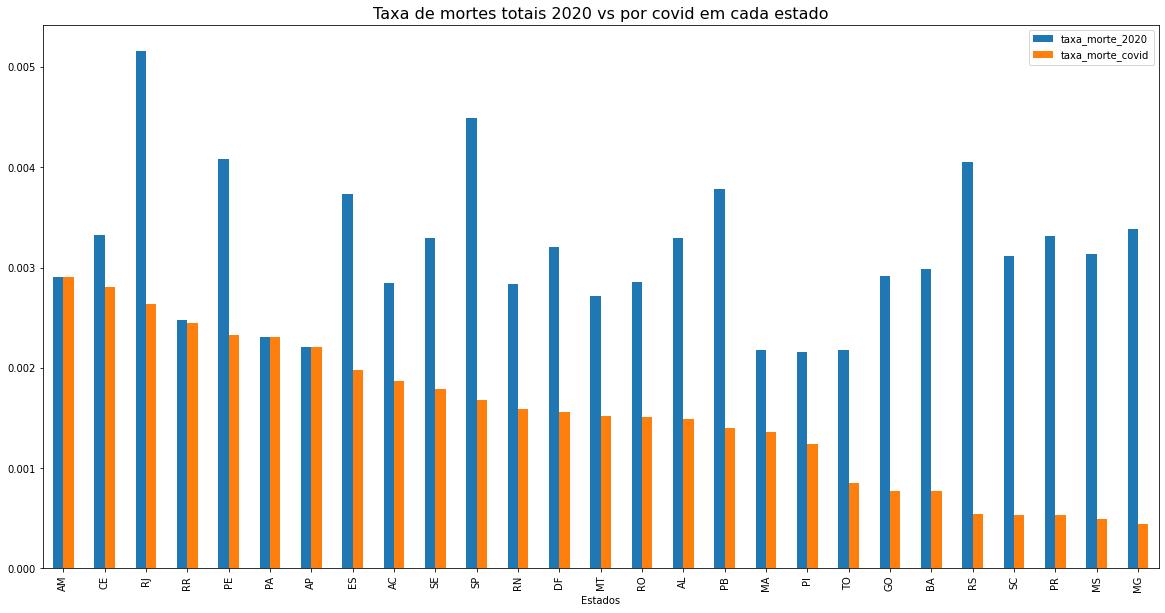

In [69]:
#criando gráfico
result = pd.concat([taxa_morte_por_estado_2020, taxa_morte_por_estado_covid], axis=1, sort=False)
result = result.sort_values(by=['taxa_morte_covid'], ascending=False)
ax = result.plot.bar(figsize=(20,10))
plt.title('Taxa de mortes totais 2020 vs por covid em cada estado', fontsize=16)
plt.xlabel('Estados')
plt.show()

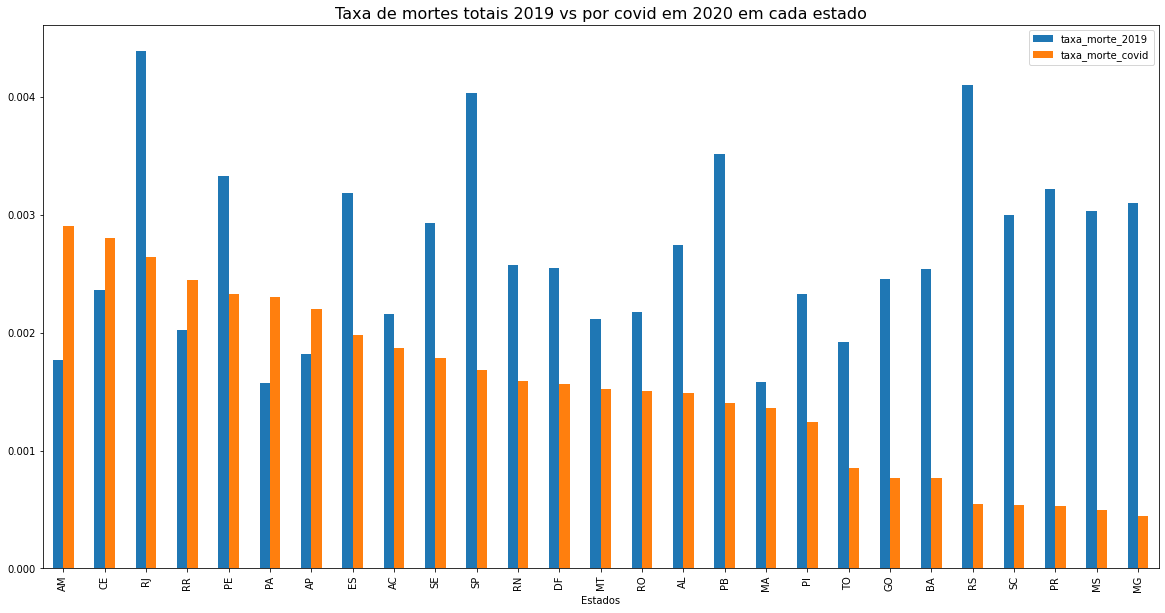

In [70]:
#criando gráfico
result = pd.concat([taxa_morte_por_estado_2019, taxa_morte_por_estado_covid], axis=1, sort=False)
result = result.sort_values(by=['taxa_morte_covid'], ascending=False)
ax = result.plot.bar(figsize=(20,10))
plt.title('Taxa de mortes totais 2019 vs por covid em 2020 em cada estado', fontsize=16)
plt.xlabel('Estados')
plt.show()